# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

In [ ]:
! git clone https://github.com/ds4e/EDA

Cloning into 'EDA'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 59 (delta 11), reused 10 (delta 10), pack-reused 43 (from 1)
Receiving objects: 100% (59/59), 4.93 MiB | 5.04 MiB/s, done.
Resolving deltas: 100% (18/18), done.


**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

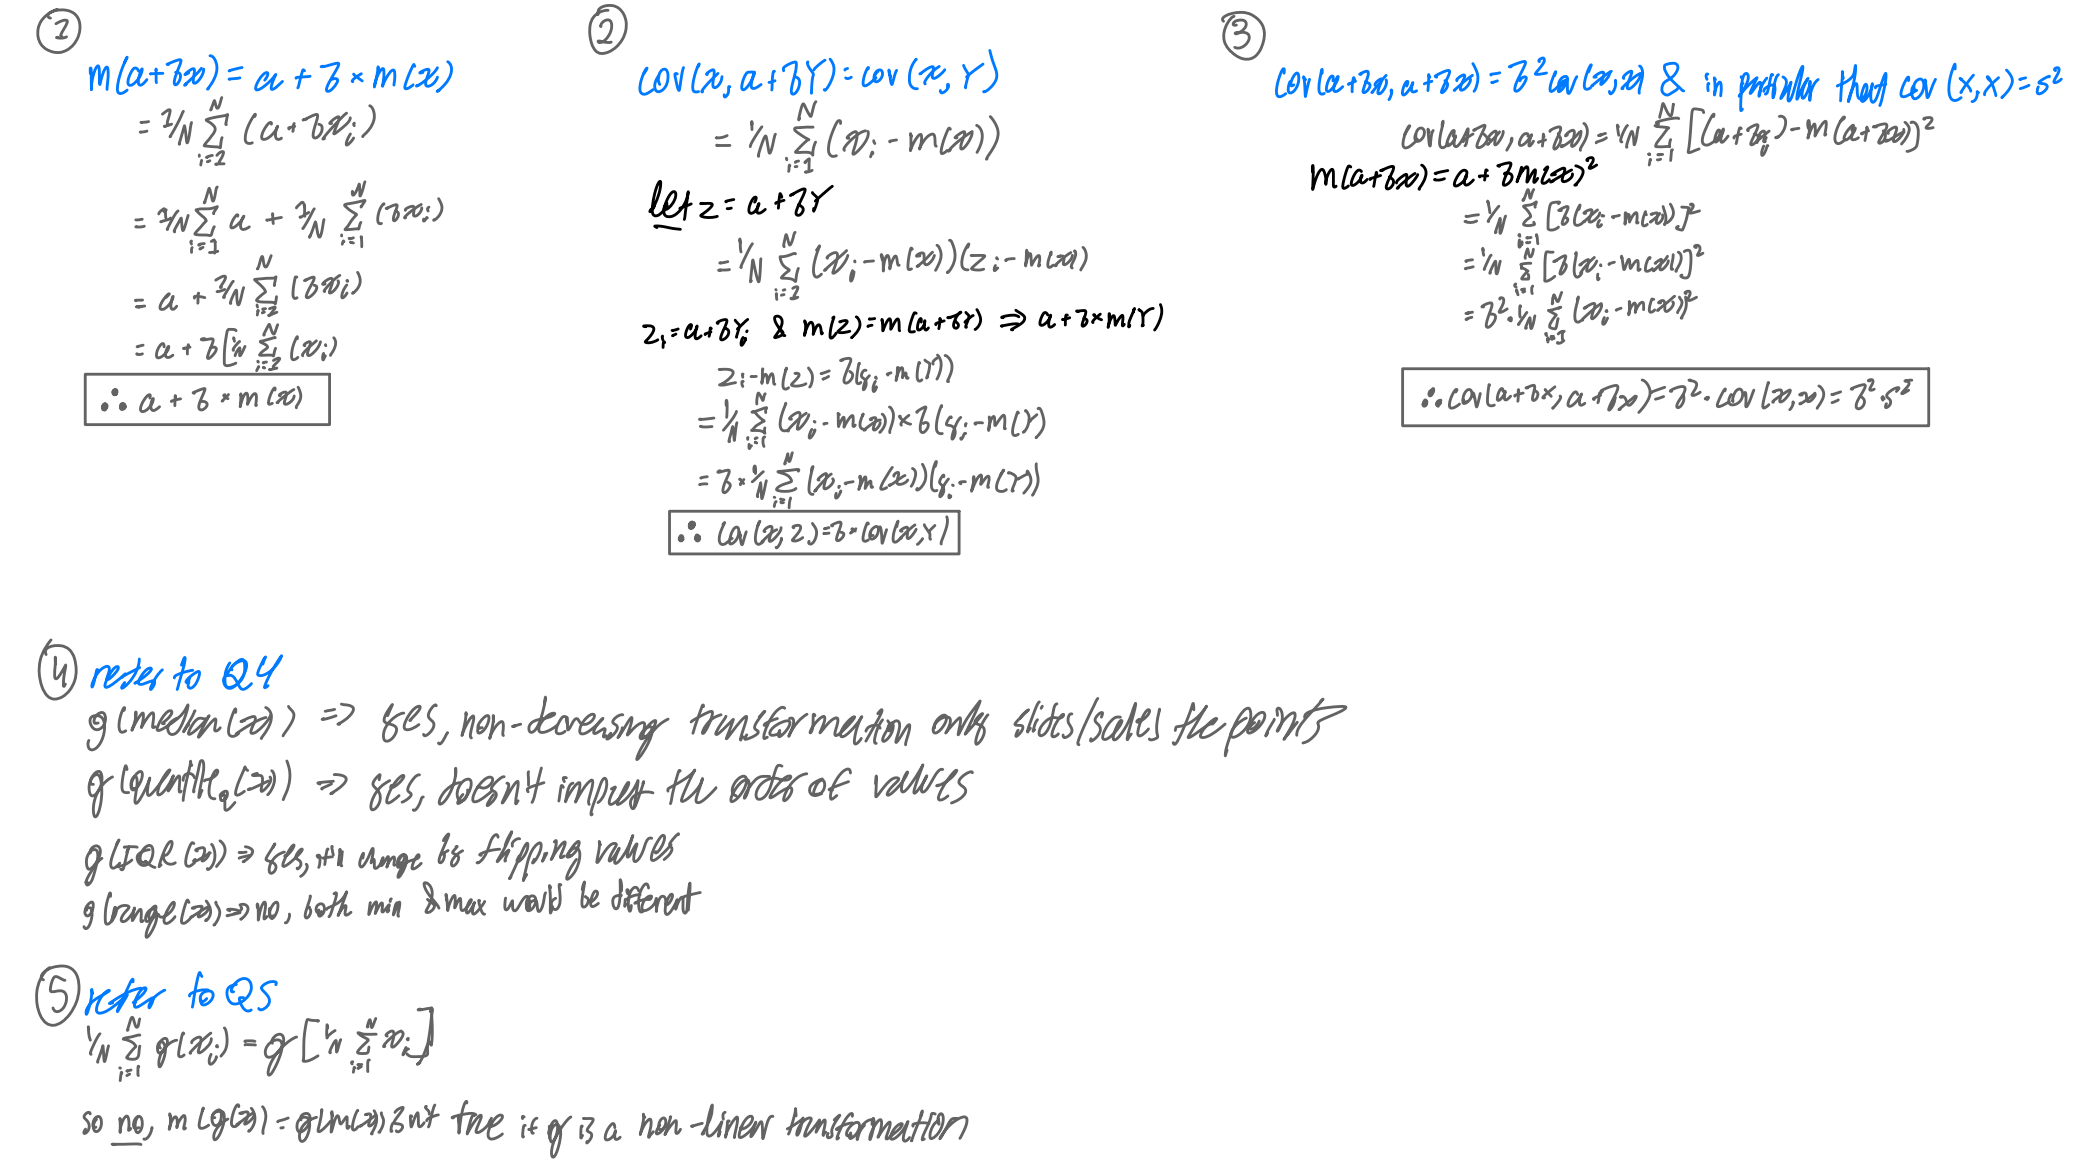

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
- **The data seems to be all over the place, which affect the histogram ebcause there's some values out there that skew the entire graph.**
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
- **Contracts are 61.2%, Monetary Gifts are 38.8%, and Real Estate is 0.039%**
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
- **Real estate gifts tend to be the biggest and Monetary gifts are smaller.**
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
- **Refer to data on Graph, relative from top to bottm respectively**
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
- **Refer to data on Graph, relative from top to bottm respectively**
7. Which giftors provide the most money, in total?
- **Qatar Foundations, for the rest refer to the graph**

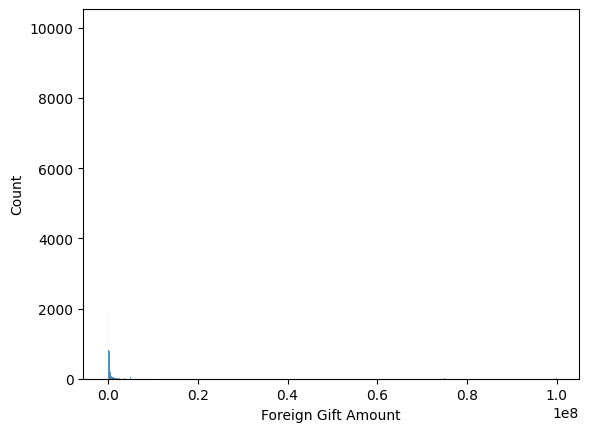

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


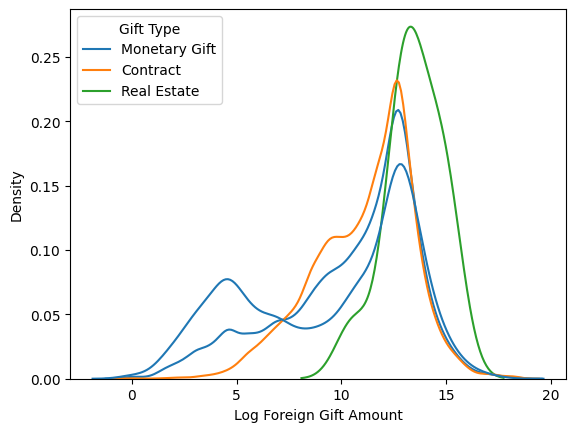

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64
Institution Name
Carnegie 

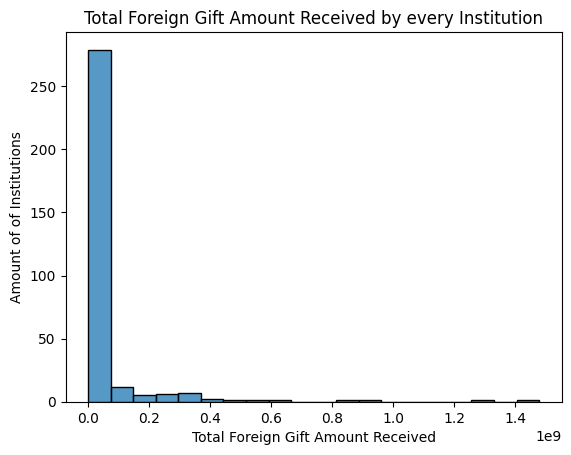

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %cd data
# !ls

#1
gift_data = pd.read_csv('/content/EDA/assignment/data/ForeignGifts_edu.csv')

#2
sns.histplot(gift_data['Foreign Gift Amount'])
plt.show()
print(gift_data['Foreign Gift Amount'].describe())
gift_data.head()

#3
gift_data['Gift Type'].value_counts()

#4
gift_data['Log Foreign Gift Amount'] = np.log(gift_data['Foreign Gift Amount'])
sns.kdeplot(gift_data['Log Foreign Gift Amount'])
sns.kdeplot(data=gift_data, x='Log Foreign Gift Amount', hue='Gift Type', common_norm=False)
plt.show()

#5
top_countries_gift = gift_data.groupby("Country of Giftor").size().sort_values(ascending=False).head(15)
print(top_countries_gift)
top_countries_amount = gift_data.groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)
print(top_countries_amount)

#6
top_instiutions = gift_data.groupby("Institution Name")["Foreign Gift Amount"].sum().sort_values(ascending=False)
print(top_instiutions.head(15))
sns.histplot(top_instiutions, bins=20)
plt.xlabel("Total Foreign Gift Amount Received")
plt.ylabel("Amount of of Institutions")
plt.title("Total Foreign Gift Amount Received by every Institution")
plt.show

#7
top_giftors = gift_data.groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(10)
print(top_giftors)

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  - **30,478 observations and 13 variables - Host ID, Host Since, Name, neighbourhood, Property Type, etc...**
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  - **Apartments and houses seem to be the most common, private rooms are often some sort of bnb or something like a dorm, surprisingly a good amount.**
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  - **Badly scaled, all the data is sort of skewed but log trans makes it better by adjustting the values.**
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  - **The price increases the more beds there are which makes sense.**
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  - **Getting the whole property seems expensive to do, renting entire properties have a price of around $290.80 and a sd of 273.53. The median follows a more relaible trend of estimate, probably because it's not affected much by what's causing the skew in data.**
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?
  - **Most properties seem to have around 1 to 3 beds. Properties also seem to only get so big so you notice this trend that the more beds the more of an anamoly they become.**

(30478, 13)


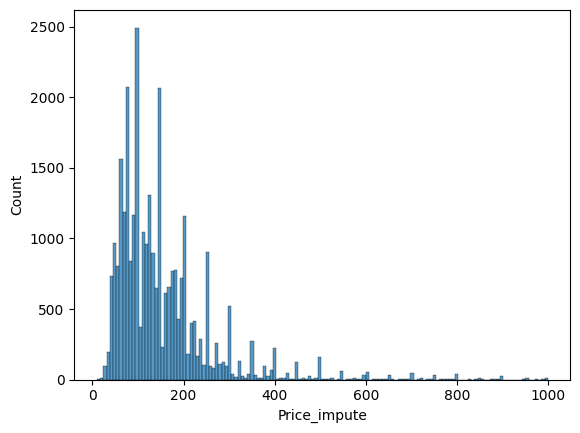

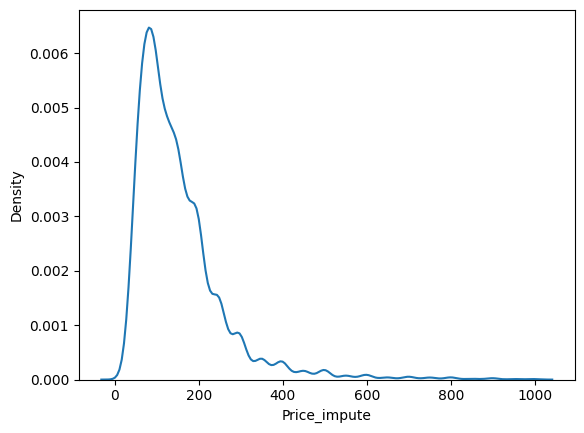

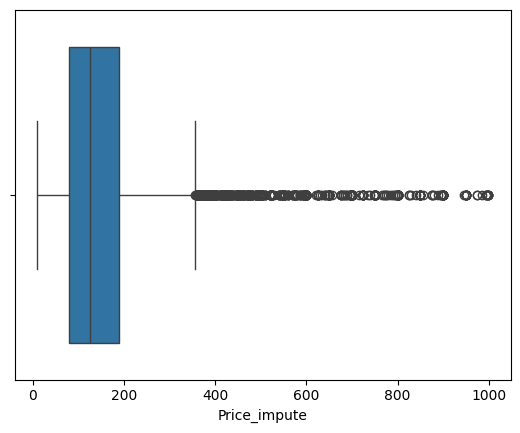

count    30478.000000
mean       153.188628
std        108.593716
min         10.000000
25%         80.000000
50%        125.000000
75%        190.000000
max        999.000000
Name: Price_impute, dtype: float64


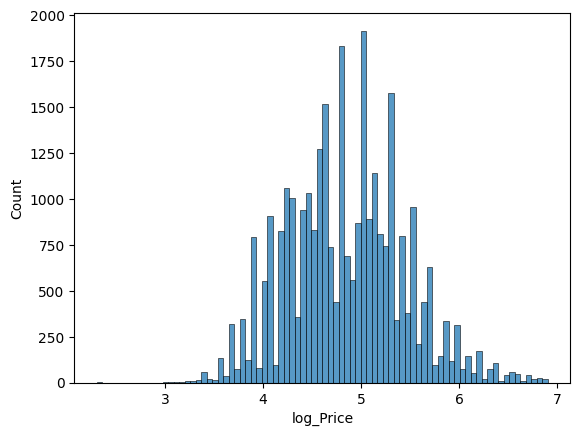

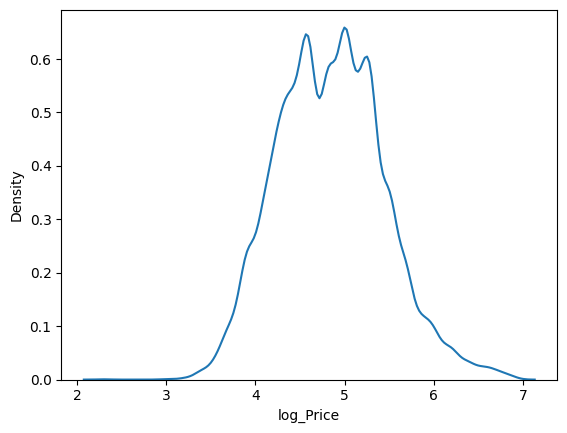

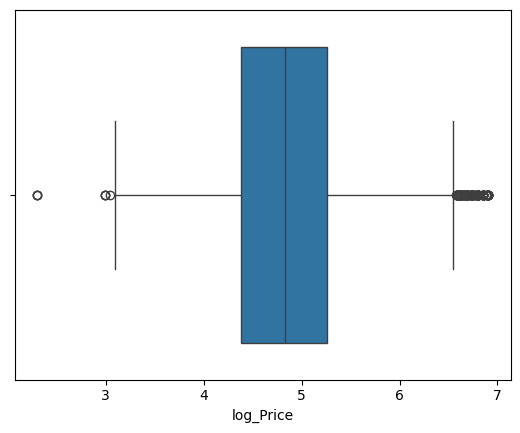

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: log_Price, dtype: float64


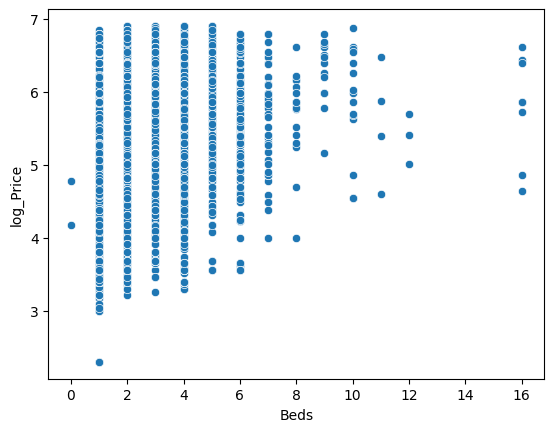

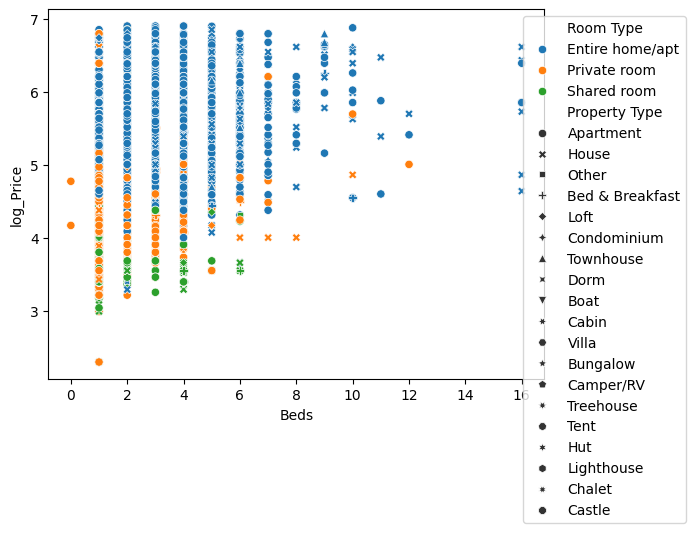

In [46]:
#1
airbnb_data = pd.read_csv('airbnb_hw.csv')

#2
print(airbnb_data.shape)
airbnb_data.head()

#3
pd.crosstab(airbnb_data['Room Type'], airbnb_data['Property Type'])

#4
airbnb_data['Price'] = pd.to_numeric(airbnb_data['Price'], errors='coerce')
airbnb_data['Price_na'] = airbnb_data['Price'].isnull()
impute_value = airbnb_data['Price'].median()
airbnb_data['Price_impute'] = airbnb_data['Price'].fillna(impute_value)
airbnb_data['Price_impute'].unique()
sns.histplot(airbnb_data['Price_impute'])
plt.show()
sns.kdeplot(airbnb_data['Price_impute'])
plt.show()
sns.boxplot(data=airbnb_data, x='Price_impute')
plt.show()
print(airbnb_data['Price_impute'].describe())
airbnb_data['log_Price'] = np.log(airbnb_data['Price'])
sns.histplot(airbnb_data['log_Price'])
plt.show()
sns.kdeplot(airbnb_data['log_Price'])
plt.show()
sns.boxplot(data=airbnb_data, x='log_Price')
plt.show()
print(airbnb_data['log_Price'].describe())

#5
sns.scatterplot(data=airbnb_data, x='Beds', y='log_Price')
plt.show()
airbnb_data.groupby('Beds')['log_Price'].describe()

#6
scatter_plot = sns.scatterplot(data=airbnb_data, x="Beds", y="log_Price", hue="Room Type", style="Property Type")
sns.move_legend(scatter_plot, "upper right", bbox_to_anchor=(1.3, 1))
plt.show()
summary_stats = airbnb_data.loc[:, ["Price", "Room Type", "Property Type"]].groupby(["Room Type", "Property Type"]).describe()

#7
sns.jointplot(data=df, x='Beds', y='log_Price', kind='hex')
plt.show()


**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.